In [1]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Loading Dataset
player_dataset = pd.read_csv('player_dataset.csv')

In [3]:
# Fetch Number of Columns and Rows
player_dataset.shape

(461, 17)

In [4]:
# Get Column names
player_dataset.columns

Index(['name', 'club', 'age', 'position', 'position_cat', 'market_value',
       'page_views', 'fpl_value', 'fpl_sel', 'fpl_points', 'region',
       'nationality', 'new_foreign', 'age_cat', 'club_id', 'big_club',
       'new_signing'],
      dtype='object')

In [5]:
# separating numerical and categorical data
numerical = player_dataset.select_dtypes(include='number').columns.to_list()
categorical = player_dataset.select_dtypes(include='object').columns.to_list()

In [6]:
#Get number of unique values in each column
player_dataset.nunique(axis=0)

name            461
club             20
age              22
position         13
position_cat      4
market_value     48
page_views      389
fpl_value        17
fpl_sel         113
fpl_points      153
region            4
nationality      61
new_foreign       2
age_cat           6
club_id          20
big_club          2
new_signing       2
dtype: int64

In [7]:
# Getting Basic Information about the Dataset 
player_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 461 entries, 0 to 460
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          461 non-null    object 
 1   club          461 non-null    object 
 2   age           461 non-null    int64  
 3   position      461 non-null    object 
 4   position_cat  461 non-null    int64  
 5   market_value  461 non-null    float64
 6   page_views    461 non-null    int64  
 7   fpl_value     461 non-null    float64
 8   fpl_sel       461 non-null    object 
 9   fpl_points    461 non-null    int64  
 10  region        460 non-null    float64
 11  nationality   461 non-null    object 
 12  new_foreign   461 non-null    int64  
 13  age_cat       461 non-null    int64  
 14  club_id       461 non-null    int64  
 15  big_club      461 non-null    int64  
 16  new_signing   461 non-null    int64  
dtypes: float64(3), int64(9), object(5)
memory usage: 61.4+ KB


In [8]:
# Remove the Null values (There is one value from 'region' which is null as seen above)
player_dataset.dropna(axis=0, how="any", inplace=True)

In [9]:
# Getting top 5 elements in order to indentify 'special characters' in each column
player_dataset.head()

,name,club,age,position,position_cat,market_value,page_views,fpl_value,fpl_sel,fpl_points,region,nationality,new_foreign,age_cat,club_id,big_club,new_signing
0,Alexis Sanchez,Arsenal,28,LW,1,65.0,4329,12.0,17.10%,264,3.0,Chile,0,4,1,1,0
1,Mesut Ozil,Arsenal,28,AM,1,50.0,4395,9.5,5.60%,167,2.0,Germany,0,4,1,1,0
2,Petr Cech,Arsenal,35,GK,4,7.0,1529,5.5,5.90%,134,2.0,Czech Republic,0,6,1,1,0
3,Theo Walcott,Arsenal,28,RW,1,20.0,2393,7.5,1.50%,122,1.0,England,0,4,1,1,0
4,Laurent Koscielny,Arsenal,31,CB,3,22.0,912,6.0,0.70%,121,2.0,France,0,4,1,1,0


In [10]:
# Removing 'percentage' symbol from 'fpl_sel' and converting values to 'float' from 'string'
player_dataset['fpl_sel'] = player_dataset['fpl_sel'].apply(lambda x: float(x[:-1]))
numerical.append('fpl_sel')
categorical.remove('fpl_sel')

In [11]:
# Get basic stats (not in default scientific notation)
player_dataset.describe().apply(lambda s: s.apply(lambda x: format(x, 'g')))

,age,position_cat,market_value,page_views,fpl_value,fpl_sel,fpl_points,region,new_foreign,age_cat,club_id,big_club,new_signing
count,460,460,460,460,460,460,460,460,460,460,460,460,460
mean,26.8152,2.18261,11.024,765.315,5.44674,3.25,57.4391,1.99348,0.0347826,3.2087,10.3391,0.304348,0.145652
std,3.95985,0.999631,12.268,932.234,1.34791,5.68049,53.1042,0.957689,0.183428,1.27995,5.73167,0.460632,0.353141
min,17,1,0.05,3,4,0,0,1,0,1,1,0,0
25%,24,1,3,220.75,4.5,0.2,5,1,0,2,6,0,0
50%,27,2,7,460,5,1,51,2,0,3,10,0,0
75%,30,3,15,900,5.5,3.3,94,2,0,4,15,1,0
max,38,4,75,7664,12.5,45,264,4,1,6,20,1,1


<AxesSubplot:>

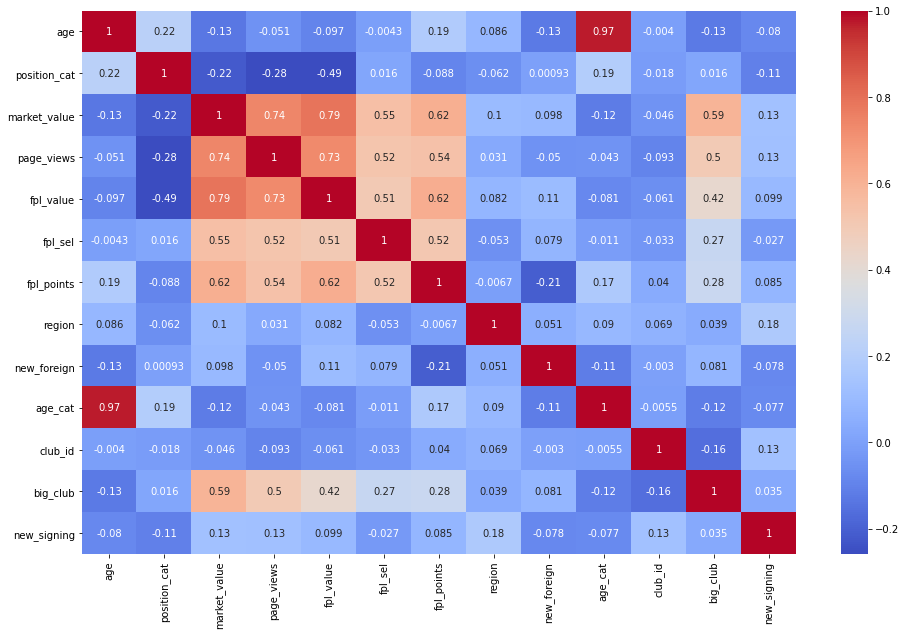

In [12]:
# Get relation between all Numerical variables (using 'correlation matrix' drawn using seaborn 'heatmap')
corr = player_dataset.corr()
plt.figure(figsize = (16,10))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, 
            cmap='coolwarm', robust=True)    # fmt=".1f", square = True, , cbar=False

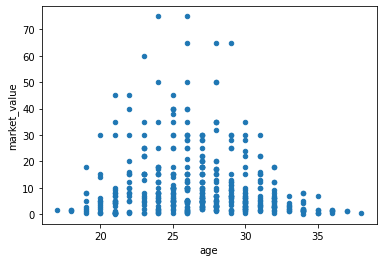

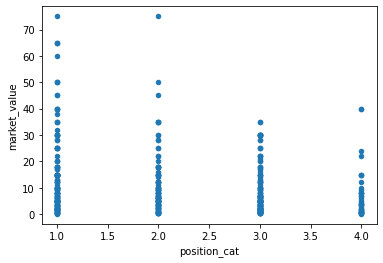

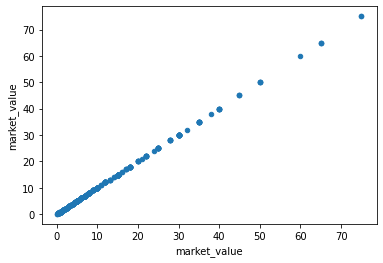

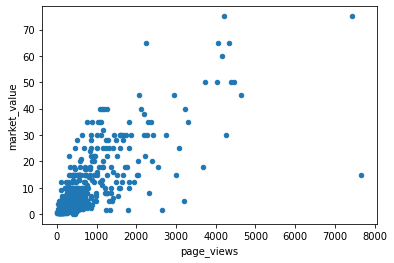

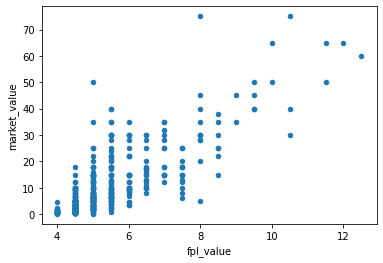

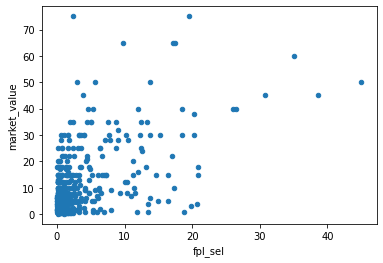

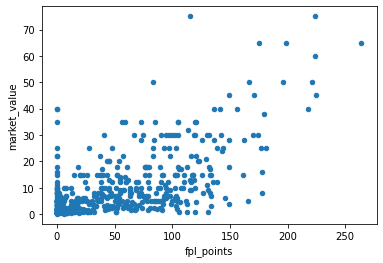

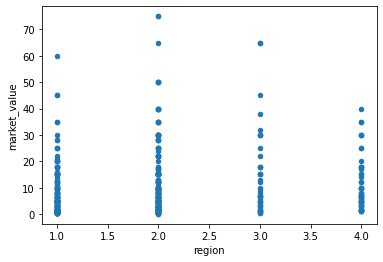

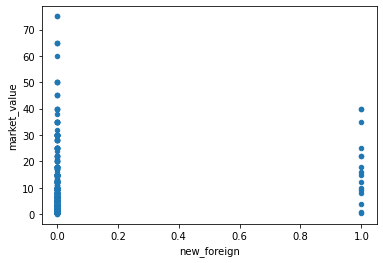

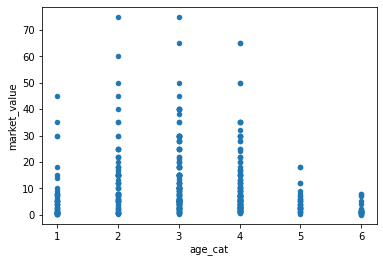

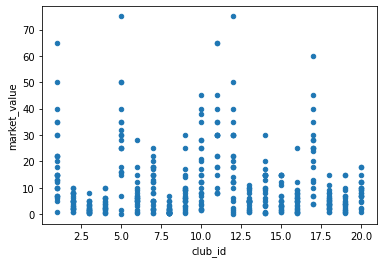

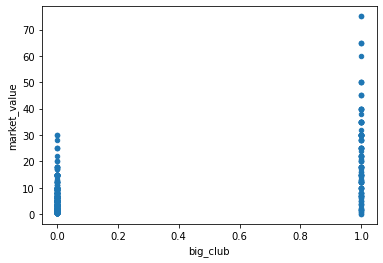

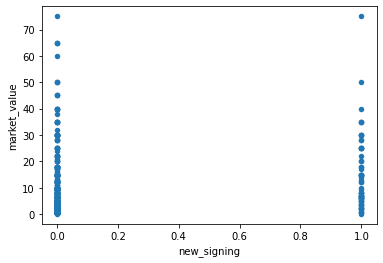

In [13]:
# Get relation between all Numerical value with target value
# (using scatter plot between target (i.e market value) and other numerical variable)
for column in player_dataset.select_dtypes(include='number'):
    player_dataset.plot(kind='scatter', x=column, y='market_value')

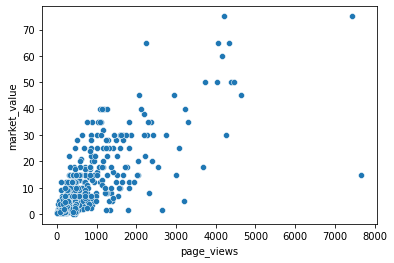

In [14]:
# Example of plotting above scatter plot using 'seaborn' 
sns.scatterplot(x=player_dataset['page_views'], y=player_dataset['market_value']);

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'position_cat'}>,
        <AxesSubplot:title={'center':'market_value'}>,
        <AxesSubplot:title={'center':'page_views'}>],
       [<AxesSubplot:title={'center':'fpl_value'}>,
        <AxesSubplot:title={'center':'fpl_points'}>,
        <AxesSubplot:title={'center':'region'}>,
        <AxesSubplot:title={'center':'new_foreign'}>],
       [<AxesSubplot:title={'center':'age_cat'}>,
        <AxesSubplot:title={'center':'club_id'}>,
        <AxesSubplot:title={'center':'big_club'}>,
        <AxesSubplot:title={'center':'new_signing'}>],
       [<AxesSubplot:title={'center':'fpl_sel'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

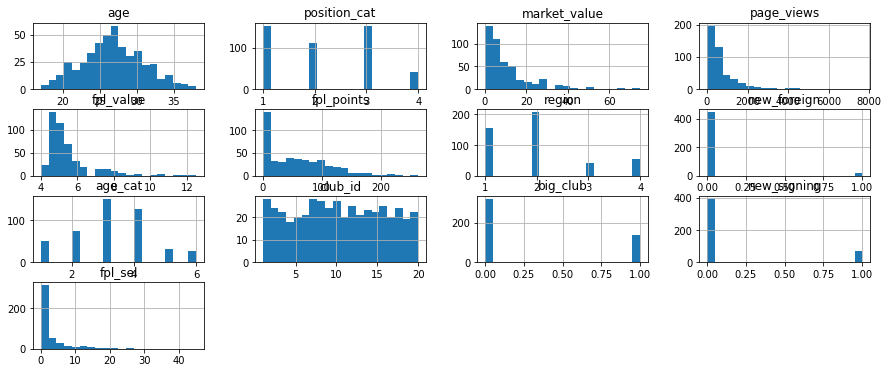

In [15]:
# Knowing variables independently (plotting histograms against count of each value)
player_dataset[numerical].hist(bins=20, figsize=(15, 6), layout=(4, 4))

<AxesSubplot:xlabel='market_value', ylabel='Count'>

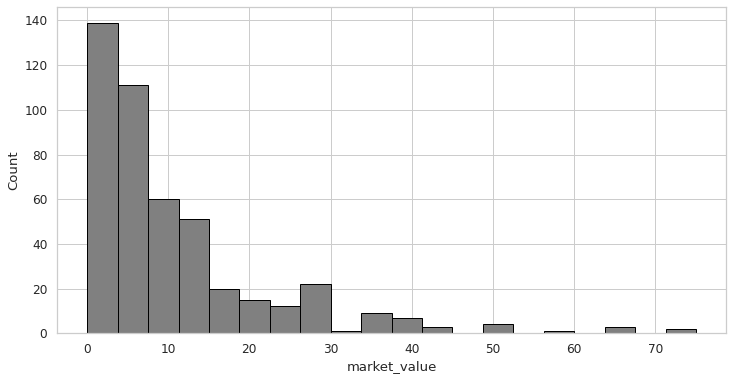

In [16]:
# Knowing variables independently (Here is the example of plotting histogram using 'seaborn')
sns.set(style='whitegrid', palette="deep", font_scale=1.1, rc={"figure.figsize": [12, 6]})
sns.histplot(player_dataset['market_value'],bins=20,facecolor='grey',edgecolor='black')

<AxesSubplot:xlabel='count', ylabel='club'>

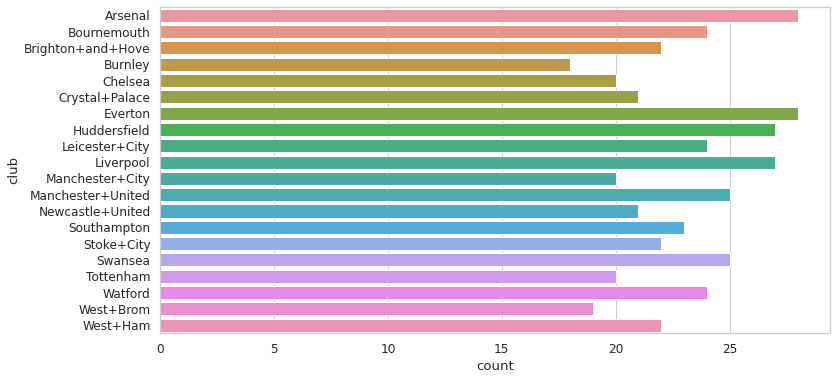

In [17]:
# Plotting Categorical Variable ('club') independently using 'seaborn'
sns.countplot(data = player_dataset, y = 'club')

<AxesSubplot:xlabel='position', ylabel='count'>

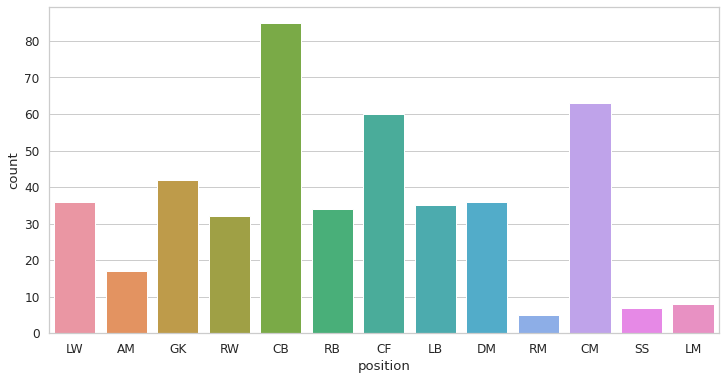

In [18]:
# Plotting Categorical Variable ('postion') independently using 'seaborn'
sns.countplot(data = player_dataset, x = 'position')

<AxesSubplot:xlabel='count', ylabel='nationality'>

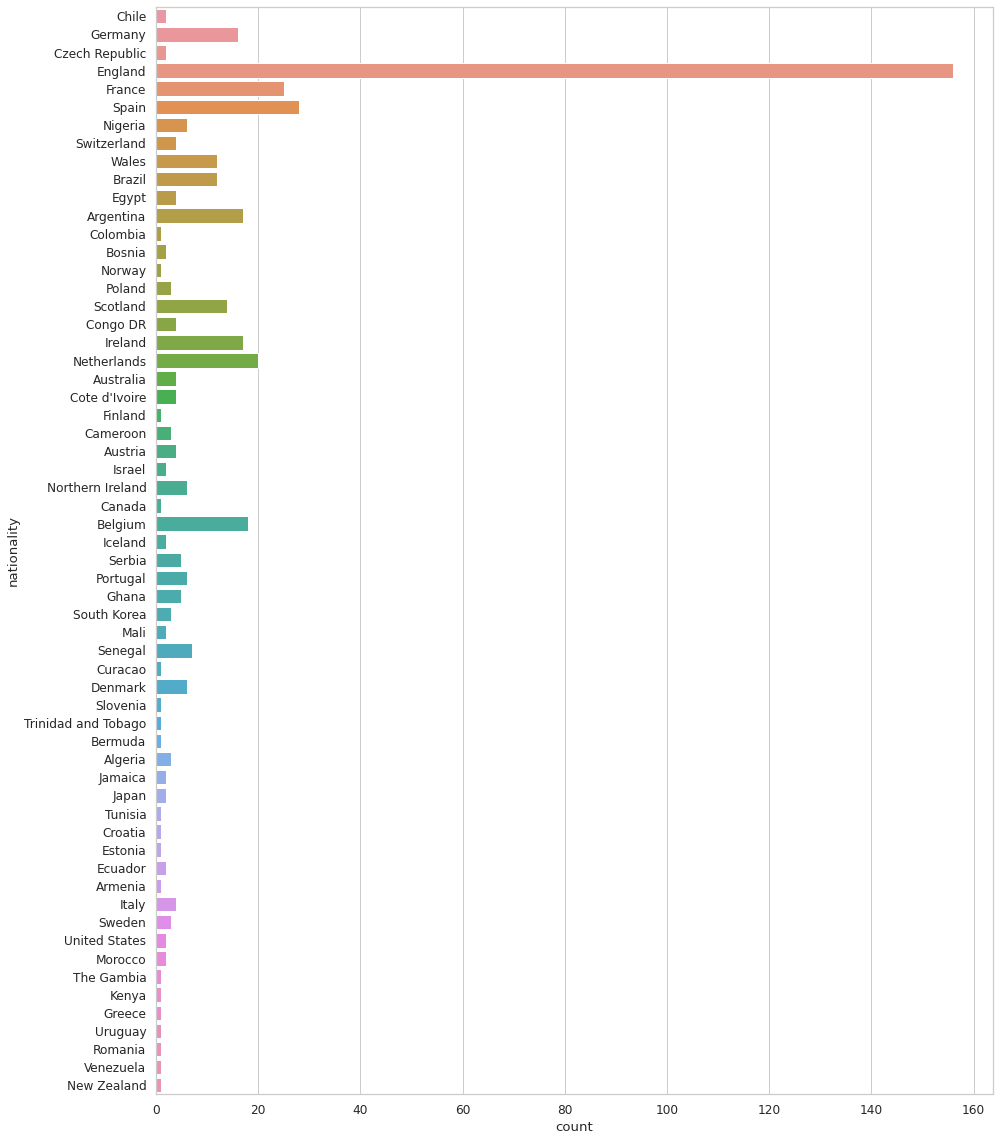

In [19]:
# Plotting Categorical Variable ('Nationality') independently using 'seaborn'
plt.figure(figsize=(15,20))
sns.countplot(data = player_dataset, y = 'nationality')

<AxesSubplot:>

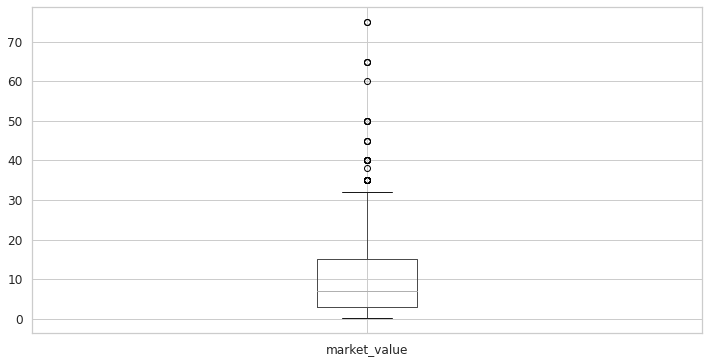

In [20]:
# Plotting box plot for market value to know the outliers 
player_dataset.boxplot('market_value')

<AxesSubplot:xlabel='position', ylabel='market_value'>

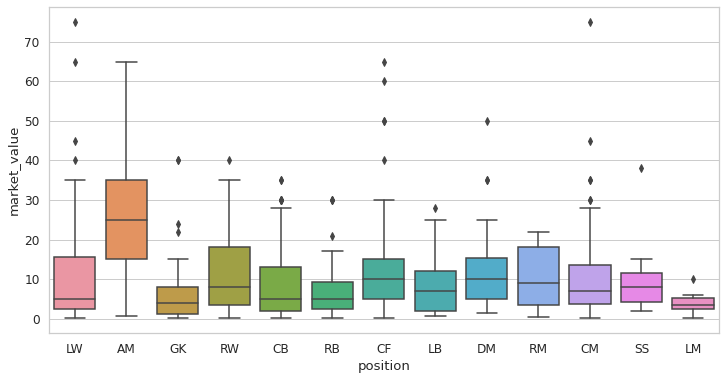

In [21]:
"""
Plotting boxplot in order to find the relationship between Market Value and other categoriacal variables
(as they are not compared using seaborn 'heatmap')
"""
# Plot boxplot between position and target market_value
sns.boxplot(x='position', y='market_value', data=player_dataset)

<AxesSubplot:xlabel='market_value', ylabel='club'>

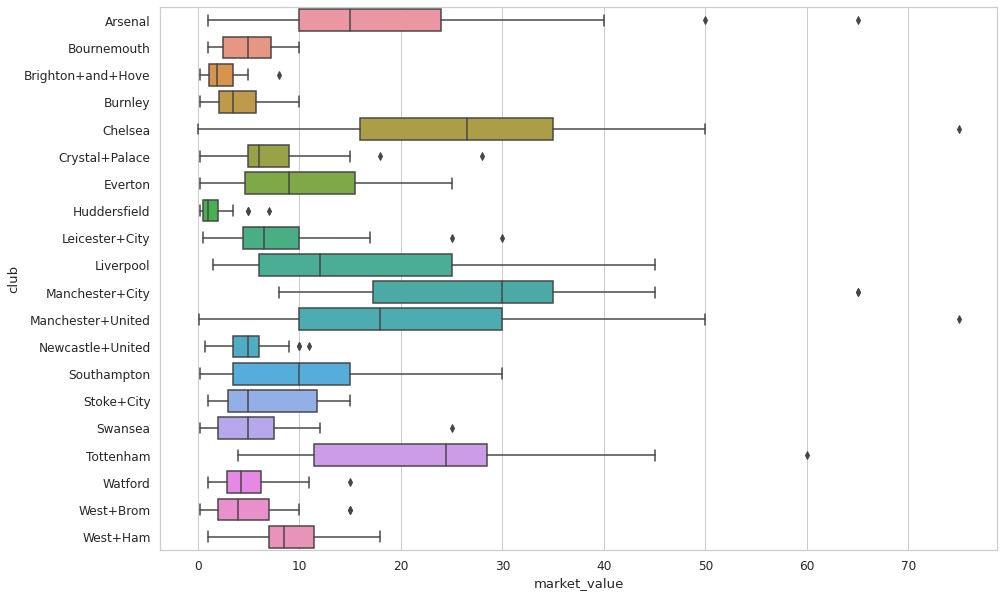

In [22]:
# Plot boxplot between club and target market_value
plt.figure(figsize=(15,10))
sns.boxplot(x='market_value', y='club', data=player_dataset)

<AxesSubplot:xlabel='market_value', ylabel='nationality'>

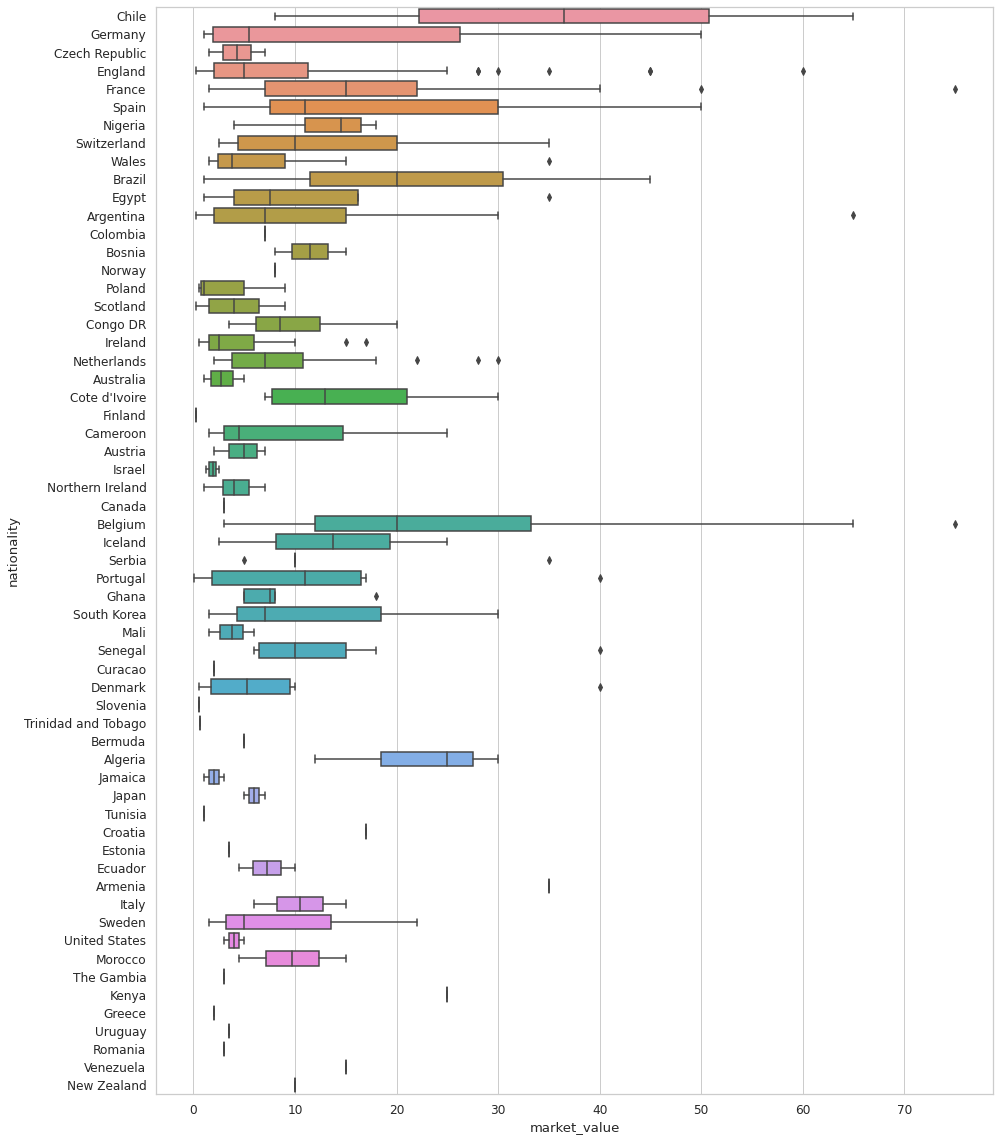

In [23]:
# Plot boxplot between nationality and target market_value
plt.figure(figsize=(15,20))
sns.boxplot(x='market_value', y='nationality', data=player_dataset)

In [24]:
# creating copy to store 'dummy data' (to handle categorical variables)
player_dataset_dummy = player_dataset.copy()

In [25]:
# create dummy values for different categorical values
def create_dummy_data(column):
    column_values = player_dataset[column].unique()
    count = 1
    dummy = {}
    for each_value in column_values:
        dummy[each_value] = count
        count += 1
    player_dataset_dummy[column] = player_dataset[column].apply(lambda x:dummy[x])

In [26]:
# dummy data created
create_dummy_data('club')
create_dummy_data('position')
create_dummy_data('nationality')
player_dataset_dummy.head()

,name,club,age,position,position_cat,market_value,page_views,fpl_value,fpl_sel,fpl_points,region,nationality,new_foreign,age_cat,club_id,big_club,new_signing
0,Alexis Sanchez,1,28,1,1,65.0,4329,12.0,17.1,264,3.0,1,0,4,1,1,0
1,Mesut Ozil,1,28,2,1,50.0,4395,9.5,5.6,167,2.0,2,0,4,1,1,0
2,Petr Cech,1,35,3,4,7.0,1529,5.5,5.9,134,2.0,3,0,6,1,1,0
3,Theo Walcott,1,28,4,1,20.0,2393,7.5,1.5,122,1.0,4,0,4,1,1,0
4,Laurent Koscielny,1,31,5,3,22.0,912,6.0,0.7,121,2.0,5,0,4,1,1,0


<AxesSubplot:>

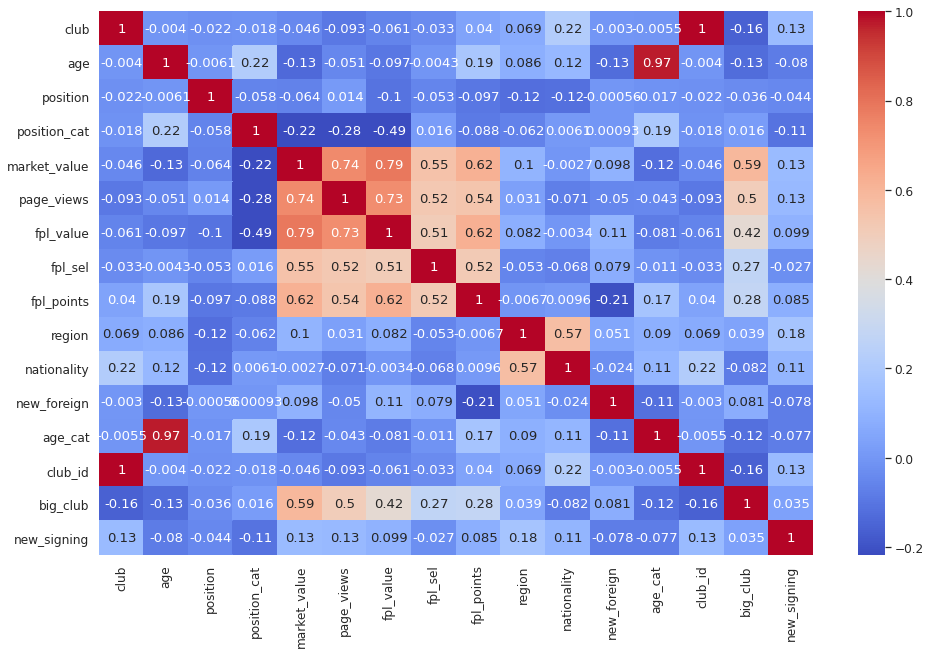

In [27]:
# correlation matrix using 'heatmap' including all the variables (categorical and numerical)
corr_dummy = player_dataset_dummy.corr()
plt.figure(figsize = (16,10))
sns.heatmap(corr_dummy, xticklabels=corr_dummy.columns, yticklabels=corr_dummy.columns, annot=True, 
            cmap='coolwarm', robust=True)  

In [28]:
"""
Analysing the above correlation we found that, following pairs are 'quite similar' to each other 
region and nationality
Position and position category 
club and club_id
age and age_cat
"""
to_remove = ['age_cat', 'club_id','new_signing', 'new_foreign']
for each in to_remove:
    numerical.remove(each)
numerical

['age',
 'position_cat',
 'market_value',
 'page_views',
 'fpl_value',
 'fpl_points',
 'region',
 'big_club',
 'fpl_sel']

In [28]:
player_dataset_dummy.to_csv('final_dataset.csv', columns=numerical,index=False)